In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [3]:
train_images_with_noise_channels[0, 600:790]

array([0.99215686, 0.99215686, 0.99215686, 0.7764706 , 0.31764707,
       0.00784314, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07058824, 0.67058825, 0.85882354,
       0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.7647059 ,
       0.3137255 , 0.03529412, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.21568628, 0.67450982,
       0.88627452, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.95686275, 0.52156866, 0.04313726, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [4]:

train_images_with_zeros_channels[0, 780:790]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
def get_model() :
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [6]:
model = get_model()

history_noise = model.fit(train_images_with_noise_channels, train_labels,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6267 - accuracy: 0.8130 - val_loss: 0.3930 - val_accuracy: 0.8788
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2538 - accuracy: 0.9211 - val_loss: 0.2258 - val_accuracy: 0.9297
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1638 - accuracy: 0.9491 - val_loss: 0.1642 - val_accuracy: 0.9495
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1161 - accuracy: 0.9632 - val_loss: 0.1571 - val_accuracy: 0.9535
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0850 - accuracy: 0.9730 - val_loss: 0.1242 - val_accuracy: 0.9631
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9799 - val_loss: 0.1580 - val_accuracy: 0.9555
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0473 - accuracy: 0.9845 - val_loss: 0.1840 - val_accuracy: 0.9510
Epoch 

In [7]:
model = get_model()

history_zeros = model.fit(train_images_with_zeros_channels, train_labels,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2889 - accuracy: 0.9165 - val_loss: 0.1613 - val_accuracy: 0.9524
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1210 - accuracy: 0.9640 - val_loss: 0.1111 - val_accuracy: 0.9664
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9765 - val_loss: 0.0950 - val_accuracy: 0.9705
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0565 - accuracy: 0.9834 - val_loss: 0.0904 - val_accuracy: 0.9743
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0432 - accuracy: 0.9876 - val_loss: 0.0785 - val_accuracy: 0.9769
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0321 - accuracy: 0.9909 - val_loss: 0.0820 - val_accuracy: 0.9783
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0795 - val_accuracy: 0.9781
Epoch 

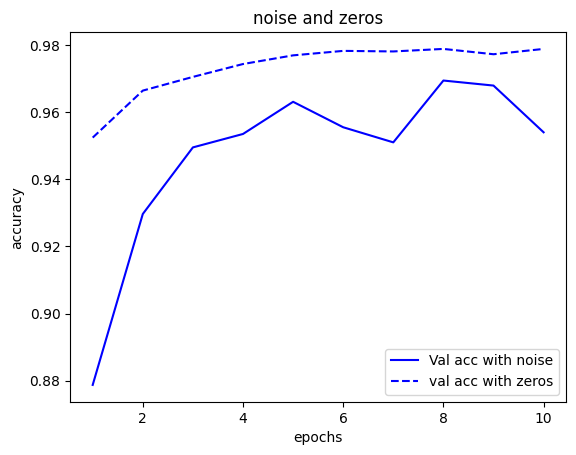

In [8]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']

epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label="Val acc with noise")
plt.plot(epochs, val_acc_zeros, "b--", label='val acc with zeros')
plt.title('noise and zeros')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()